### Act Report
The clean dataset 'twitter_archive_master' has 574 clean data. In this observations, we're gonna analyze the key points wghich are rating,retweets,dog stage and favorite and other key point might be included.

In [267]:
# To get started, let's import the libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
df = pd.read_csv('twitter_archive_master.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 15 columns):
tweet_id          574 non-null int64
timestamp         574 non-null object
source            574 non-null object
text              574 non-null object
expanded_urls     574 non-null object
name              360 non-null object
jpg_url           574 non-null object
img_num           574 non-null int64
p1                574 non-null object
p2                574 non-null object
p3                574 non-null object
retweet_count     574 non-null int64
favorite_count    574 non-null int64
dog_stages        77 non-null object
rating            574 non-null float64
dtypes: float64(1), int64(4), object(10)
memory usage: 67.3+ KB


* #### First, Whtat is the correlation between retweets and and favorites user?

In [268]:
print ('corr' , df['retweet_count'].corr(df['favorite_count']))

corr 0.8015765436596847


##### Visulize :

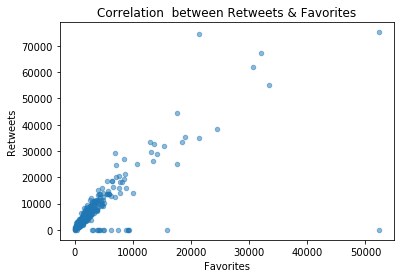

In [285]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
x = df.plot(kind = 'scatter', x = 'retweet_count', y = 'favorite_count', alpha = 0.5)
x.grid(False)
plt.xlabel('Favorites')
plt.ylabel('Retweets')
plt.title('Correlation  between Retweets & Favorites')
plt.savefig('Retweets&FevoritesCorrelation.png')

> As we can see, the correlation betwen Retweetss and fevoites is 0.80 wich is perfect positive correlation.

* #### Second, What the average between retweets  corresponding to favorite over year?

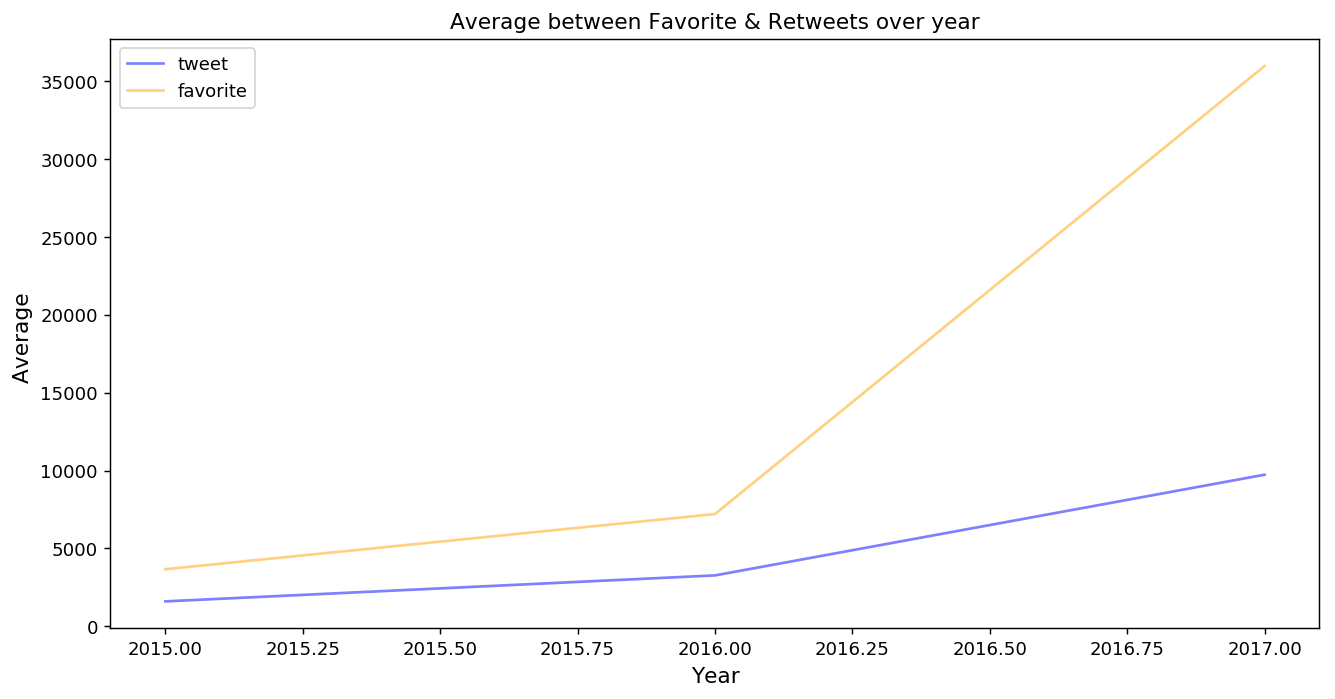

In [270]:
year =  df['timestamp'].apply(lambda x: x.year)
month = df['timestamp'].apply(lambda x: x.month)

tweet_year = df.groupby(year)['retweet_count'].mean()
favorite_year = df.groupby(year)['favorite_count'].mean()


#figure size(width, height)
plt.figure(figsize=(12,6), dpi = 130)

#on x-axis
plt.xlabel('Year', fontsize = 12)
#on y-axis
plt.ylabel('Average ', fontsize = 12)
#title of the line plot
plt.title('Average between Favorite & Retweets over year')

#plotting the graph
plt.plot(tweet_year, color='blue',label='tweet',alpha=0.5)
plt.plot(favorite_year, color='orange',label='favorite',alpha=0.5)



#displaying the line plot
plt.legend()
plt.show()



* #### What the most tweets comes from?

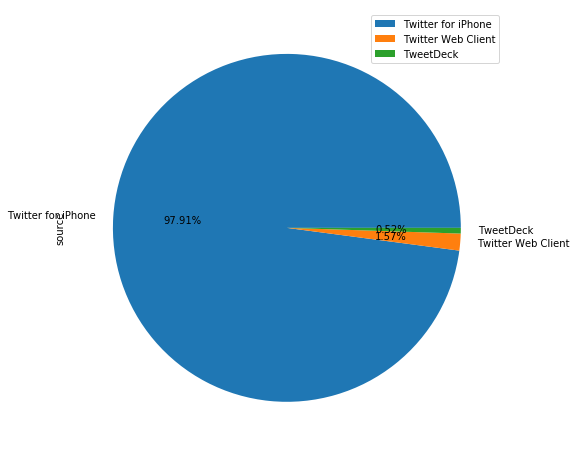

In [306]:
s = df['source'].value_counts(ascending=False)
s.plot(kind='pie',legend=False, subplots=True, autopct='%.2f%%',figsize=(12,8));
plt.legend();

In [272]:
s

Twitter for iPhone    562
Twitter Web Client      9
TweetDeck               3
Name: source, dtype: int64

* #### Average rating correspoding to favorite?

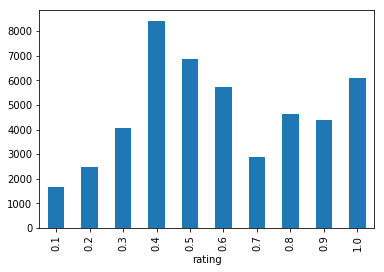

In [273]:
df.groupby('rating')['favorite_count'].mean().plot(kind ='bar');

In [288]:
df.rating.mean()

0.868466898954703

* #### What is the Most pupular dog's names?

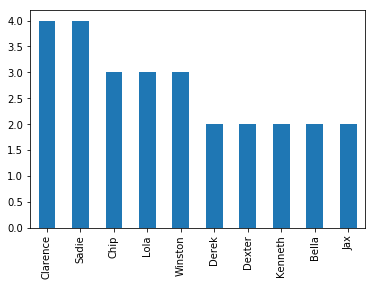

In [274]:
name_count = df['name'].value_counts(ascending=False)
name_count.head(10).plot(kind = 'bar');

In [304]:
name_count.head(10)

Clarence    4
Sadie       4
Chip        3
Lola        3
Winston     3
Derek       2
Dexter      2
Kenneth     2
Bella       2
Jax         2
Name: name, dtype: int64

* #### Pupular dog Stages?

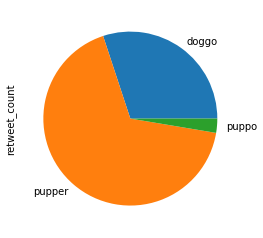

In [303]:
df.groupby('dog_stages')['retweet_count'].sum().plot(kind='pie');

In [301]:
df.groupby('dog_stages')['retweet_count'].sum()

dog_stages
doggo      83707
pupper    187346
puppo       7326
Name: retweet_count, dtype: int64

* #### Heat Map of Correlation and Basic statistics

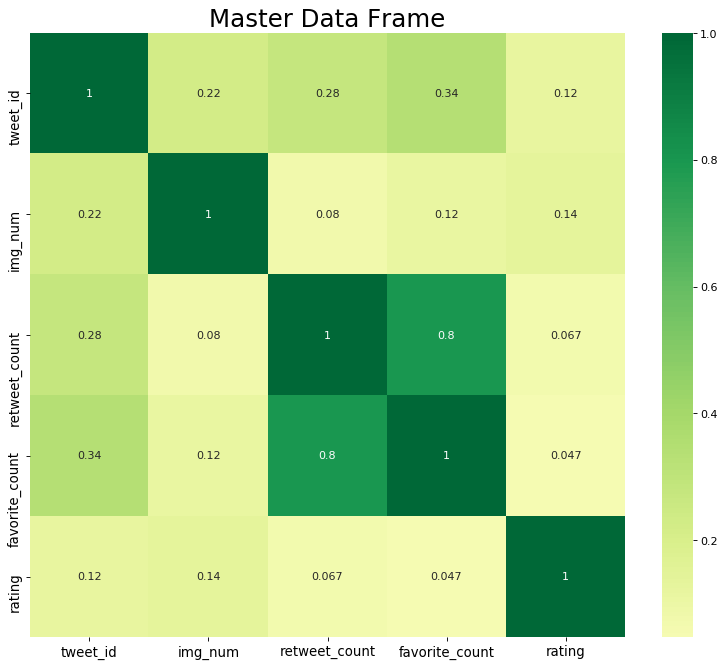

In [277]:
# Plot
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)

# Decorations
plt.title('Master Data Frame', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [289]:
df.describe()

,tweet_id,img_num,retweet_count,favorite_count,rating
count,5.740000e+02,574.000000,574.000000,574.000000,574.000000
mean,6.951086e+17,1.094077,2388.130662,5415.658537,0.868467
std,3.433410e+16,0.366389,4741.179396,8240.880185,0.196919
min,6.660293e+17,1.000000,2.000000,0.000000,0.100000
25%,6.707870e+17,1.000000,603.750000,1679.750000,0.800000
50%,6.784352e+17,1.000000,1091.500000,3045.000000,1.000000
75%,7.079372e+17,1.000000,2110.000000,5573.500000,1.000000
max,8.834828e+17,4.000000,52360.000000,75163.000000,1.000000


### Insight
* In Average rating corresonding to favorite, we notice that the rating 0.4 was the highest corresponding to favorite.
* the correlation between retweets and and favorites user is perfest positive correlation which is 0.80 strong correlation.
* Pupular dog Stages corresponding to retweet count we found that pupper with sum of 187346.
* In the dog's names we found that Clarence and Sadie are the hieghst count.
* The most tweets comes from Iphone with 97%.
* the average trend between retweets and  favorite over year , we notice that favorite are higher than retweets wich means users like a tweet ithout retweet it back.

> #### Based on the observation above,I cunclude that posts might have likes but no all of them were retweeted .Also, Comoon rating have lower retweet and favorite counts. 